## Lab 2 Report

Author: Logan Aikas


In [1]:
#import cell
%matplotlib notebook
import simpleaudio as sa
from scipy.io import wavfile as wav
from scipy import signal as sig
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import decimal

## Summary

This lab involves performing different operations on signals on a computer. Unlike in continuous time there are some different things to consider when performing operations on a computer such as missing data, adding zero values for data, and other small details. The goal of this lab is to learn and apply these techniques.

## Assignment 1 --  Time Scaling Audio Signals

In [5]:
# Assignment 1 - Time Scaling Function

# Part A

# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter 
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    #returns two values n (numerator) and d(denominator) that represent 
    #the number a in terms of a fraction n/d
    n,d = decimal.Decimal(a).as_integer_ratio()
    
    y = sig.resample_poly(x, d, n)
    #0 through the number of points 
    t = np.arange(0, len(y),1)*(1/fs)
    return y,t

<IPython.core.display.Javascript object>


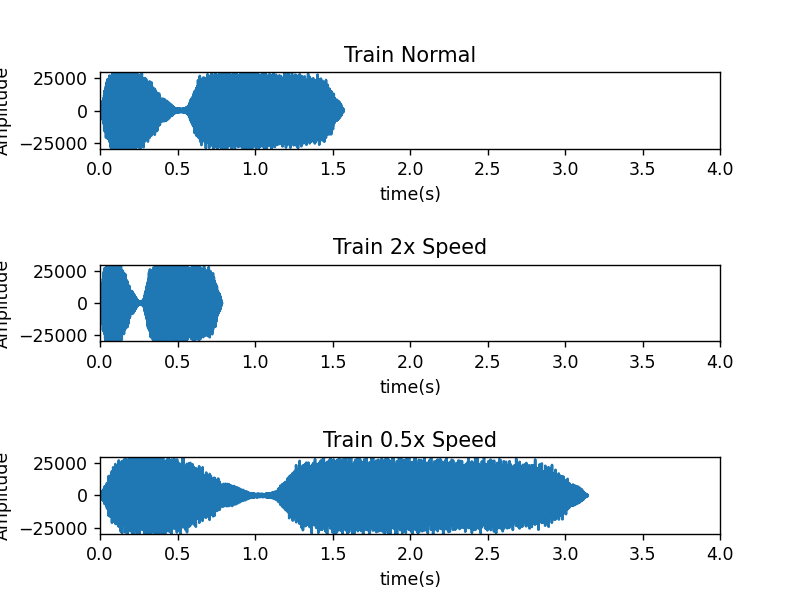

(0.0, 4.0)

In [7]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part B

fs, y = wav.read('train32.wav')

t_y = np.arange(0, len(y), 1)
t_y = (t_y/fs)

# Part C

w, t_w = timescale(y, fs, 2)

t_w = t_w
v, t_v = timescale(y, fs, 0.5)
t_v = t_v

outfile1 = "y(t)_lab2.wav"
wav.write(outfile1, fs, y.astype('int16'))


wav_obj = sa.WaveObject.from_wave_file('y(t)_lab2.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

outfile2 = "w(t)_lab2.wav"
wav.write(outfile2, fs, w.astype('int16'))


wav_obj = sa.WaveObject.from_wave_file('w(t)_lab2.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

outfile3 = "v(t)_lab2.wav"
wav.write(outfile3, fs, v.astype('int16'))


wav_obj = sa.WaveObject.from_wave_file('v(t)_lab2.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

# Part D

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace=1.5, wspace=6.2)

plt.subplot(3,1,1)
plt.plot(t_y, y)
plt.title("Train Normal")
plt.ylabel('Amplitude')
plt.xlabel('time(s)')
plt.ylim(-30000, 30000)
plt.xlim(0, 4)


plt.subplot(3,1,2)
plt.plot(t_w, w)
plt.title("Train 2x Speed")
plt.ylabel('Amplitude')
plt.xlabel('time(s)')
plt.ylim(-30000, 30000)
plt.xlim(0, 4)

plt.subplot(3,1,3)
plt.plot(t_v, v)
plt.title("Train 0.5x Speed")
plt.ylabel('Amplitude')
plt.xlabel('time(s)')
plt.ylim(-30000, 30000)
plt.xlim(0, 4)

###  Discussion

If you were to run the time scale of a = -1, the first signal y(t) would be reflected about the amplitude axis. In the subplot you would see all 0 points because the whole signal would be only valid for t <= 0. You would actually expect this behavior for each graph. Since there are no time shifts involved, making the scale factor negative for signals that start at t = 0 means the whole signal is flipped abou the amplitude axis and so all 3 subplots would essentially look like 0, or null signals.

The scripts would also not be able to run, because the function sig.resample_poly requires the upsample and downsample values to be greater than or equal to 1. And since the up sampling and down sampling factors are created based on a, and the sign of a persists when the upsampling and downsampling are chosen, this means the script will not be able to run if a = -1 is provided.

## Assignment 2 -- Time Shift Operation

In [3]:
# Assignment 2 - Time Shift Operation

# Part A

# x is the input signal vector
# fs is the sampling frequency
# t0 is the amount to shift the signal by
# the function returns t_y which is the time samples vector, and y the shifted vector

def timeshift(x, fs, t0):
    n0 = int(t0*fs)
    zeros_to_append = np.zeros(abs(n0))
    if n0 < 0:
        y = np.concatenate((zeros_to_append, x), axis = None)
        t_y = np.arange(0, len(y), 1)
        t_y = (t_y/fs)
        return y, t_y
    else:
        y = np.concatenate((x[len(zeros_to_append):], zeros_to_append), axis = None)
        t_y = np.arange(0, len(y), 1)
        t_y = (t_y/fs)
        return y, t_y


<IPython.core.display.Javascript object>


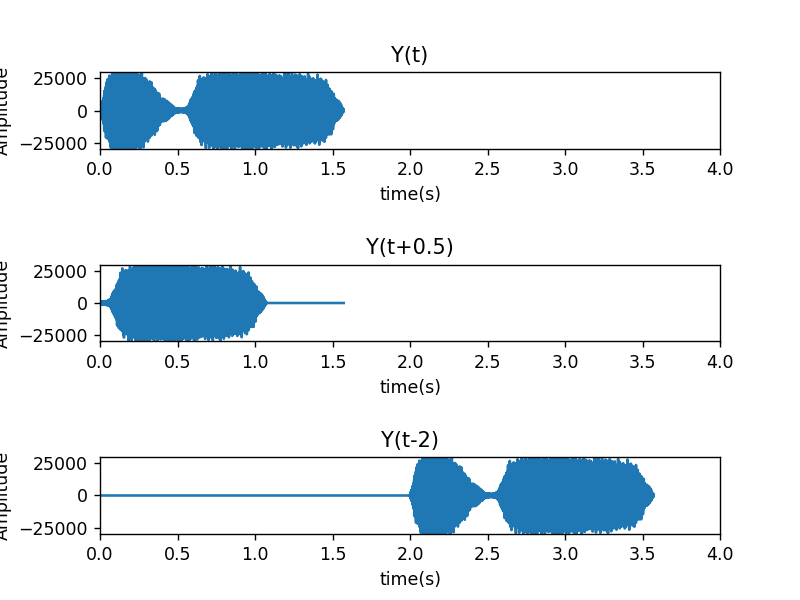

In [9]:
# Assignment 2 - Time Shift Operation

# Part B

w, t_w = timeshift(y, fs, 0.5)

t_w = t_w
v, t_v = timeshift(y, fs, -2)
t_v = t_v


fig2 = plt.figure(2)
fig2.subplots_adjust(hspace=1.5, wspace=5.2)

plt.subplot(3,1,1)
plt.plot(t_y, y)
plt.title("Y(t)")
plt.ylabel('Amplitude')
plt.xlabel('time(s)')
plt.ylim(-30000, 30000)
plt.xlim(0, 4)


plt.subplot(3,1,2)
plt.plot(t_w, w)
plt.title("Y(t+0.5)")
plt.ylabel('Amplitude')
plt.xlabel('time(s)')
plt.ylim(-30000, 30000)
plt.xlim(0, 4)

plt.subplot(3,1,3)
plt.plot(t_v, v)
plt.title("Y(t-2)")
plt.ylabel('Amplitude')
plt.xlabel('time(s)')
plt.ylim(-30000, 30000)
plt.xlim(0, 4)

# Part C

outfile4 = "y(t+0.5).wav"
wav.write(outfile4, fs, w.astype('int16'))

wav_obj = sa.WaveObject.from_wave_file('y(t+0.5).wav')
play_obj = wav_obj.play()
play_obj.wait_done()

outfile5 = "y(t-2).wav"
wav.write(outfile5, fs, v.astype('int16'))

wav_obj = sa.WaveObject.from_wave_file('y(t-2).wav')
play_obj = wav_obj.play()
play_obj.wait_done()


###  Discussion

Include discussion on this assignment, answering any questions. This is a markdown cell.

## Assignment 3 -- Working with Sound Files

<IPython.core.display.Javascript object>


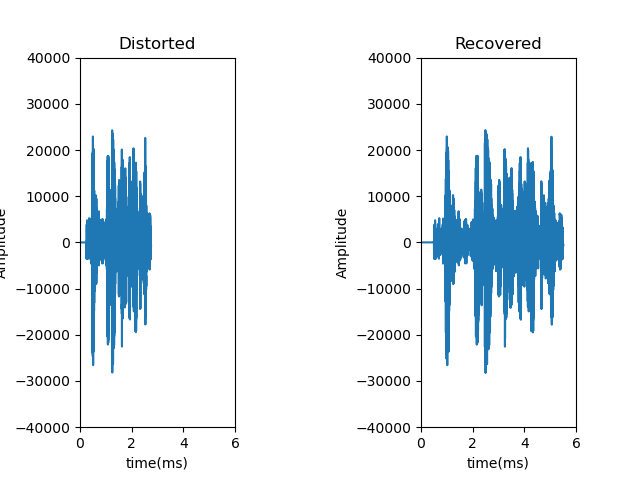

(0.0, 6.0)

In [6]:
# Assignment 3 -- Working with Sound Files

# Part A

#undoes y(2t - 0.5)
def Transformation1(x, fs):
    #shift left by 0.25
    ya,ta = timeshift(x, fs, 0.25)
    
    #speed 0.5x
    ya,ta = timescale(x, fs, 0.5)
    
    return ya,ta
    
#undoes y(0.5t-2)
def Transformation2(x, fs):
    #shift left by 4
    yb,tb = timeshift(x, fs, 4)
    
    #speed 2x
    yb,tb = timescale(x, fs, 2)
    
    return yb,tb

# Part B
# TODO: Code that solves B

fs, y = wav.read('s10.wav')
t_y = np.arange(0, len(y), 1)
t_y = (t_y/fs)

ya, ta = Transformation1(y, fs)

outfile6 = "s1test1.wav"
wav.write(outfile6, fs, ya.astype('int16'))

wav_obj = sa.WaveObject.from_wave_file('s1test1.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

yb,tb = Transformation2(y, fs)

outfile7 = "s1test2.wav"
wav.write(outfile7, fs, yb.astype('int16'))

wav_obj = sa.WaveObject.from_wave_file('s1test2.wav')
play_obj = wav_obj.play()
play_obj.wait_done()

# Part C
# TODO: Code that solves C

fig3 = plt.figure(3)
fig3.subplots_adjust(hspace=0.5, wspace=1.2)

plt.subplot(1,2,1)
plt.plot(t_y, y)
plt.title("Distorted")
plt.ylabel('Amplitude')
plt.xlabel('time(ms)')
plt.ylim(-40000, 40000)
plt.xlim(0,6)


plt.subplot(1,2,2)
plt.plot(ta, ya)
plt.title("Recovered")
plt.ylabel('Amplitude')
plt.xlabel('time(ms)')
plt.ylim(-40000, 40000)
plt.xlim(0,6)

### Discussion

The prank applied was scale by 2 then delay by 0.5, therefore the fucntion above
"Transformation1" is the one to solve all the quotes. I tried it on every quote, and 
it is the one to decode them all.
